In [1]:
# Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import json
import requests

In [2]:
#import main CSV and trim columns to used data
ontimeMarketing = "../Resources/T_ONTIME_MARKETING.csv"

airlineData = pd.read_csv(ontimeMarketing, encoding="utf-8", dtype=object)
cleanAirlineData = airlineData[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME", "DEST_STATE_ABR", "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY", "TAXI_OUT", "TAXI_IN", "ARR_TIME", "ARR_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "DIV_AIRPORT_LANDINGS", "DIV_ACTUAL_ELAPSED_TIME"]].fillna(0.0)
cleanAirlineData

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
0,"New York, NY",NY,"Los Angeles, CA",CA,0900,0852,-8.00,18.00,5.00,1124,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
1,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232,-3.00,17.00,12.00,2107,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
2,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754,-6.00,18.00,8.00,2041,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
3,"Los Angeles, CA",CA,"Boston, MA",MA,0750,0742,-8.00,20.00,15.00,1638,...,0.00,0.0,0.00,0.00,0.00,19.00,0.00,0.00,0,0.0
4,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458,-4.00,22.00,5.00,1654,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582420,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,1200,1203,3.00,12.00,5.00,1218,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
582421,"Seattle, WA",WA,"Denver, CO",CO,1800,1842,42.00,15.00,5.00,2218,...,0.00,0.0,0.00,0.00,0.00,6.00,0.00,42.00,0,0.0
582422,"Orlando, FL",FL,"Austin, TX",TX,0705,0703,-2.00,18.00,4.00,0907,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
582423,"Los Angeles, CA",CA,"Sacramento, CA",CA,1315,1430,75.00,15.00,3.00,1549,...,0.00,0.0,0.00,69.00,0.00,0.00,0.00,0.00,0,0.0


In [3]:
"""
GeoAPIfy integration here for extra credit
"""

'\nGeoAPIfy integration here for extra credit\n'

In [3]:
# filter down to Denver flights only, and fill null values
denverAirlines = cleanAirlineData.loc[(cleanAirlineData["ORIGIN_CITY_NAME"] == "Denver, CO") | (cleanAirlineData["DEST_CITY_NAME"] == "Denver, CO")].reset_index(drop=True)
denverAirlines

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
0,"Denver, CO",CO,"Phoenix, AZ",AZ,1206,1204,-2.00,13.00,4.00,1355,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
1,"Phoenix, AZ",AZ,"Denver, CO",CO,0930,0926,-4.00,16.00,6.00,1110,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
2,"Dallas/Fort Worth, TX",TX,"Denver, CO",CO,2245,2244,-1.00,17.00,31.00,0002,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
3,"Dallas/Fort Worth, TX",TX,"Denver, CO",CO,1027,1041,14.00,27.00,10.00,1155,...,0.00,0.0,0.00,14.00,0.00,3.00,0.00,0.00,0,0.0
4,"Denver, CO",CO,"Dallas/Fort Worth, TX",TX,1240,1247,7.00,12.00,6.00,1531,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48992,"Salt Lake City, UT",UT,"Denver, CO",CO,1515,1515,0.00,13.00,10.00,1635,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
48993,"Tampa, FL",FL,"Denver, CO",CO,2045,2038,-7.00,7.00,7.00,2222,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
48994,"Denver, CO",CO,"Santa Ana, CA",CA,0835,0828,-7.00,12.00,6.00,0940,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
48995,"Houston, TX",TX,"Denver, CO",CO,0625,0620,-5.00,12.00,7.00,0736,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0


## Delay Reasons Comparison - Denver

In [7]:
# filter to flights with arrival and departure delays
delayedFlights = denverAirlines.loc[(denverAirlines["DEP_DELAY"].astype(float) > 0.0) | (denverAirlines["ARR_DELAY"].astype(float) > 0.0)]
delayedFlights = delayedFlights[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME", "DEST_STATE_ABR", "DEP_DELAY", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]]
delayedFlights

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2,"Dallas/Fort Worth, TX",TX,"Denver, CO",CO,-1.00,12.00,0.0,0.0,0.0,0.0,0.0
3,"Dallas/Fort Worth, TX",TX,"Denver, CO",CO,14.00,17.00,14.00,0.00,3.00,0.00,0.00
4,"Denver, CO",CO,"Dallas/Fort Worth, TX",TX,7.00,-7.00,0.0,0.0,0.0,0.0,0.0
5,"Denver, CO",CO,"Dallas/Fort Worth, TX",TX,-2.00,1.00,0.0,0.0,0.0,0.0,0.0
6,"Charlotte, NC",NC,"Denver, CO",CO,43.00,10.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
48970,"San Francisco, CA",CA,"Denver, CO",CO,26.00,31.00,0.00,0.00,5.00,0.00,26.00
48977,"St. Louis, MO",MO,"Denver, CO",CO,3.00,-21.00,0.0,0.0,0.0,0.0,0.0
48982,"Detroit, MI",MI,"Denver, CO",CO,7.00,-6.00,0.0,0.0,0.0,0.0,0.0
48986,"Denver, CO",CO,"Orlando, FL",FL,11.00,12.00,0.0,0.0,0.0,0.0,0.0


In [8]:
""" Credit to Lauren Graves for this code block! """
# Collect flight info for delay types/reason

# Create a new DataFrame with only the delay columns
delayTypes = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
delayData = delayedFlights[delayTypes]

# Convert delay column values to numeric
delayData = delayData.apply(pd.to_numeric, errors='coerce')

# Filter rows where all delay columns are 0.0
all_zero_rows = delayData[delayData.eq(0.0).all(axis=1)]

# Print the number of rows with all delay columns as 0.0
num_all_zero_rows = all_zero_rows.shape[0]
print(f"Number of rows with all delay columns as 0.0: {num_all_zero_rows}")

# Obtain counts for delay types based on delay type columns with a value greater than 0.0 for each row
delay_counts = {"CARRIER_DELAY": 0, "WEATHER_DELAY": 0, "NAS_DELAY": 0, "SECURITY_DELAY": 0, "LATE_AIRCRAFT_DELAY": 0}

for index, row in delayData.iterrows():
    for col in delayTypes:
        if row[col] > 0.0:
            delay_counts[col] += 1

print("Counts for delay types based on delay type columns with a value greater than 0.0 for each row:")
for key, value in delay_counts.items():
    print(f"{key}: {value}")

Number of rows with all delay columns as 0.0: 13400
Counts for delay types based on delay type columns with a value greater than 0.0 for each row:
CARRIER_DELAY: 6470
WEATHER_DELAY: 610
NAS_DELAY: 4985
SECURITY_DELAY: 159
LATE_AIRCRAFT_DELAY: 5824


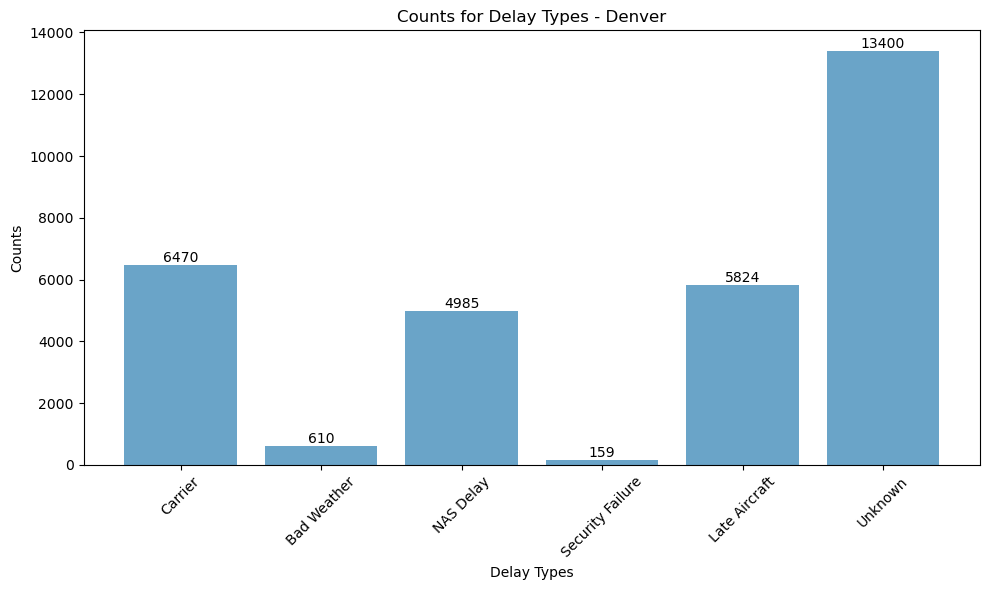

In [18]:
""" Credit to Lauren Graves for this code block! """
# Create a Bar Chart showing the different types of delays

# Convert delay column values to numeric
delayedFlights['CARRIER_DELAY'] = pd.to_numeric(delayedFlights['CARRIER_DELAY'], errors='coerce')
delayedFlights['WEATHER_DELAY'] = pd.to_numeric(delayedFlights['WEATHER_DELAY'], errors='coerce')
delayedFlights['NAS_DELAY'] = pd.to_numeric(delayedFlights['NAS_DELAY'], errors='coerce')
delayedFlights['SECURITY_DELAY'] = pd.to_numeric(delayedFlights['SECURITY_DELAY'], errors='coerce')
delayedFlights['LATE_AIRCRAFT_DELAY'] = pd.to_numeric(delayedFlights['LATE_AIRCRAFT_DELAY'], errors='coerce')

# Calculate the counts for each delay type
count_carrier_delay = len(delayedFlights[delayedFlights['CARRIER_DELAY'] > 0.0])
count_weather_delay = len(delayedFlights[delayedFlights['WEATHER_DELAY'] > 0.0])
count_nas_delay = len(delayedFlights[delayedFlights['NAS_DELAY'] > 0.0])
count_security_delay = len(delayedFlights[delayedFlights['SECURITY_DELAY'] > 0.0])
count_late_aircraft_delay = len(delayedFlights[delayedFlights['LATE_AIRCRAFT_DELAY'] > 0.0])

# Calculate the count for rows with all delay columns as 0.0
num_all_zero_rows = len(delayedFlights[(delayedFlights['CARRIER_DELAY'] == 0.0) & 
                        (delayedFlights['WEATHER_DELAY'] == 0.0) & (delayedFlights['NAS_DELAY'] == 0.0) & 
                        (delayedFlights['SECURITY_DELAY'] == 0.0) & (delayedFlights['LATE_AIRCRAFT_DELAY'] == 0.0)])

# Create the delay_counts dictionary including the "Other reason" category
delay_counts = {
    "Carrier": count_carrier_delay,
    "Bad Weather": count_weather_delay,
    "NAS Delay": count_nas_delay,
    "Security Failure": count_security_delay,
    "Late Aircraft": count_late_aircraft_delay,
    "Unknown": num_all_zero_rows
}

# Create a list of delay types and their corresponding counts
delay_types = list(delay_counts.keys())
delay_counts_values = list(delay_counts.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(delay_types, delay_counts_values, color='#6aa4c8')

# Add annotations for each bar with the corresponding counts
for bar, count in zip(bars, delay_counts_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', rotation="horizontal")

plt.xlabel('Delay Types')
plt.ylabel('Counts')
plt.title('Counts for Delay Types - Denver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('DenverDelayTypes.png')

# Show the bar chart
plt.show()

## Time of Elapsed Delay - Denver
Credit To Lauren Graves for the majority of this section's code!

In [36]:
# Filter for flights departing from Denver, CO and find the maximum DEP_DELAY
max_dep_delay_denver = delayedFlights[delayedFlights["ORIGIN_CITY_NAME"] == "Denver, CO"]["DEP_DELAY"].max()

# Filter for flights arriving at Denver, CO and find the maximum ARR_DELAY
max_arr_delay_Denver = delayedFlights[delayedFlights["DEST_CITY_NAME"] == "Denver, CO"]["ARR_DELAY"].max()

print("Maximum Arrival Delay for Denver, CO:", max_arr_delay_Denver)

print("Maximum Departure Delay for Denver, CO:", max_dep_delay_denver)

# Convert 'ARR_DELAY' and 'DEP_DELAY' columns to numeric type
delayedFlights["ARR_DELAY"] = pd.to_numeric(delayedFlights["ARR_DELAY"], errors='coerce')
delayedFlights["DEP_DELAY"] = pd.to_numeric(delayedFlights["DEP_DELAY"], errors='coerce')

# Filter for flights where the origin city is Denver, CO and find the minimum DEP_DELAY
min_dep_delay_Denver = delayedFlights[(delayedFlights["ORIGIN_CITY_NAME"] == "Denver, CO") & (delayedFlights["DEP_DELAY"] >= 0)]["DEP_DELAY"].min()

# Filter for flights where the destination city is Denver, CO and find the minimum ARR_DELAY
min_arr_delay_Denver = delayedFlights[(delayedFlights["DEST_CITY_NAME"] == "Denver, CO") & (delayedFlights["ARR_DELAY"] >= 0)]["ARR_DELAY"].min()

print("Minimum Departure Delay for flights from Denver, CO (excluding negative values):", min_dep_delay_Denver)
print("Minimum Arrival Delay for flights to Denver, CO (excluding negative values):", min_arr_delay_Denver)

# Filter for rows where either DEP_DELAY is non-negative for origin city Denver or ARR_DELAY is non-negative for destination city Denver
filtered_flights = delayedFlights[((delayedFlights["ORIGIN_CITY_NAME"] == "Denver, CO") & (delayedFlights["DEP_DELAY"] >= 0)) | ((delayedFlights["DEST_CITY_NAME"] == "Denver, CO") & (delayedFlights["ARR_DELAY"] >= 0))]

# Display the filtered DataFrame
filtered_flights

Maximum Arrival Delay for Denver, CO: 1816.0
Maximum Departure Delay for Denver, CO: 1340.0
Minimum Departure Delay for flights from Denver, CO (excluding negative values): 0.0
Minimum Arrival Delay for flights to Denver, CO (excluding negative values): 0.0


,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2,"Dallas/Fort Worth, TX",TX,"Denver, CO",CO,-1.0,12.0,0.0,0.0,0.0,0.0,0.0
3,"Dallas/Fort Worth, TX",TX,"Denver, CO",CO,14.0,17.0,14.0,0.0,3.0,0.0,0.0
4,"Denver, CO",CO,"Dallas/Fort Worth, TX",TX,7.0,-7.0,0.0,0.0,0.0,0.0,0.0
6,"Charlotte, NC",NC,"Denver, CO",CO,43.0,10.0,0.0,0.0,0.0,0.0,0.0
7,"Denver, CO",CO,"Charlotte, NC",NC,18.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
48961,"Denver, CO",CO,"San Francisco, CA",CA,16.0,20.0,0.0,0.0,4.0,5.0,11.0
48965,"Denver, CO",CO,"Salt Lake City, UT",UT,1.0,-18.0,0.0,0.0,0.0,0.0,0.0
48970,"San Francisco, CA",CA,"Denver, CO",CO,26.0,31.0,0.0,0.0,5.0,0.0,26.0
48986,"Denver, CO",CO,"Orlando, FL",FL,11.0,12.0,0.0,0.0,0.0,0.0,0.0


For departure delays, in 0-15 mins, there are 5438 delays
For arrival delays, in 0-15 mins, there are 3620 delays
For departure delays, in 15-30 mins, there are 2406 delays
For arrival delays, in 15-30 mins, there are 1781 delays
For departure delays, in 30-60 mins, there are 2091 delays
For arrival delays, in 30-60 mins, there are 1336 delays
For departure delays, in 60-120 mins, there are 1372 delays
For arrival delays, in 60-120 mins, there are 900 delays
For departure delays, in 120+ mins, there are 735 delays
For arrival delays, in 120+ mins, there are 774 delays


C:\Users\Andragon941\AppData\Local\Temp\ipykernel_38096\3560846234.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"For departure delays, in {label} mins, there are {dep_delay_counts[i]} delays")
C:\Users\Andragon941\AppData\Local\Temp\ipykernel_38096\3560846234.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"For arrival delays, in {label} mins, there are {arr_delay_counts[i]} delays")


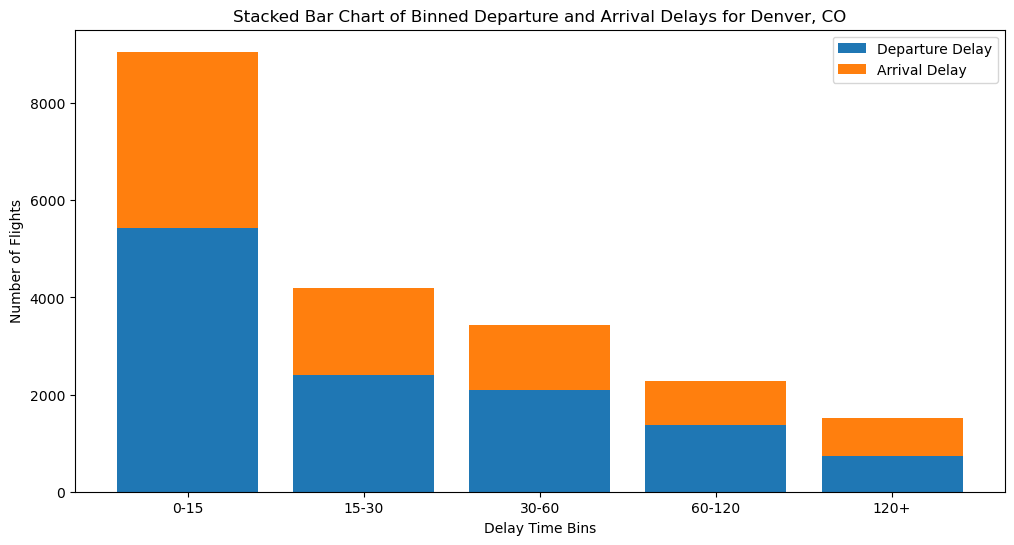

In [51]:
# Time of Delay (length); create a stacked bar chart based on departures from target city & arrivals to target city
# Binned to different intervals
# Define the bins for delay intervals
bins = [0, 15, 30, 60, 120, float('inf')]
labels = ['0-15', '15-30', '30-60', '60-120', '120+']

# Filter for flights departing from Denver, CO and bin the departure delays
dep_delay_denver = filtered_flights[filtered_flights["ORIGIN_CITY_NAME"] == "Denver, CO"].copy()
dep_delay_denver.loc[:, 'DEP_DELAY_BIN'] = pd.cut(dep_delay_denver['DEP_DELAY'], bins=bins, labels=labels, right=False)

# Filter for flights arriving at Denver, CO and bin the arrival delays
arr_delay_denver = filtered_flights[filtered_flights["DEST_CITY_NAME"] == "Denver, CO"].copy()
arr_delay_denver.loc[:, 'ARR_DELAY_BIN'] = pd.cut(arr_delay_denver['ARR_DELAY'], bins=bins, labels=labels, right=False)

# Group by the bins and count the number of flights for departure and arrival delays
dep_delay_counts = dep_delay_denver['DEP_DELAY_BIN'].value_counts().reindex(labels, fill_value=0)
arr_delay_counts = arr_delay_denver['ARR_DELAY_BIN'].value_counts().reindex(labels, fill_value=0)

# Create a stacked bar chart for binned departure and arrival delays
plt.figure(figsize=(12, 6))
plt.bar(labels, dep_delay_counts, label='Departure Delay')
plt.bar(labels, arr_delay_counts, bottom=dep_delay_counts, label='Arrival Delay')

plt.xlabel('Delay Time Bins')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Chart of Binned Departure and Arrival Delays for Denver, CO')
plt.legend()

# Print the counts as text below the chart
for i, label in enumerate(labels):
    print(f"For departure delays, in {label} mins, there are {dep_delay_counts[i]} delays")
    print(f"For arrival delays, in {label} mins, there are {arr_delay_counts[i]} delays")
plt.show()

## Flight Status Distribution
Credit To Lauren Graves for the majority of this section's code!

In [25]:
# Collect the number of delays, cancelled, or diverted flights
# Filter for flights with departure delays for origin city Atlanta
dep_delay_denver = denverAirlines[(denverAirlines["ORIGIN_CITY_NAME"] == "Denver, CO") & (denverAirlines["DEP_DELAY"].astype(float) > 0)]

# Filter for flights with arrival delays for destination city Atlanta
arr_delay_denver = denverAirlines[(denverAirlines["DEST_CITY_NAME"] == "Denver, CO") & (denverAirlines["ARR_DELAY"].astype(float) > 0)]

# Convert "CANCELLED" and "DIVERTED" columns to numeric values using .loc
denverAirlines.loc[:, "CANCELLED"] = pd.to_numeric(denverAirlines["CANCELLED"], errors='coerce')
denverAirlines.loc[:, "DIVERTED"] = pd.to_numeric(denverAirlines["DIVERTED"], errors='coerce')

# Filter for flights that are cancelled (any number higher than 0.0)
cancelled_flights = denverAirlines[denverAirlines["CANCELLED"] > 0.0]

# Filter for flights that are diverted (any number higher than 0.0)
diverted_flights = denverAirlines[denverAirlines["DIVERTED"] > 0.0]

# Count the number of flights for each condition
num_dep_delay_atlanta = len(dep_delay_denver)
num_arr_delay_atlanta = len(arr_delay_denver)
num_cancelled = len(cancelled_flights)
num_diverted = len(diverted_flights)
num_no_delays = len(denverAirlines) - num_dep_delay_atlanta - num_arr_delay_atlanta - num_cancelled - num_diverted 

print("Number of flights with departure delays for Denver:", num_dep_delay_atlanta)
print("Number of flights with arrival delays for Denver:", num_arr_delay_atlanta)
print("Number of cancelled flights:", num_cancelled)
print("Number of diverted flights:", num_diverted)
print("Number of on-time or early flights:", num_no_delays)

Number of flights with departure delays for Denver: 11794
Number of flights with arrival delays for Denver: 8212
Number of cancelled flights: 2148
Number of diverted flights: 88
Number of on-time or early flights: 26755


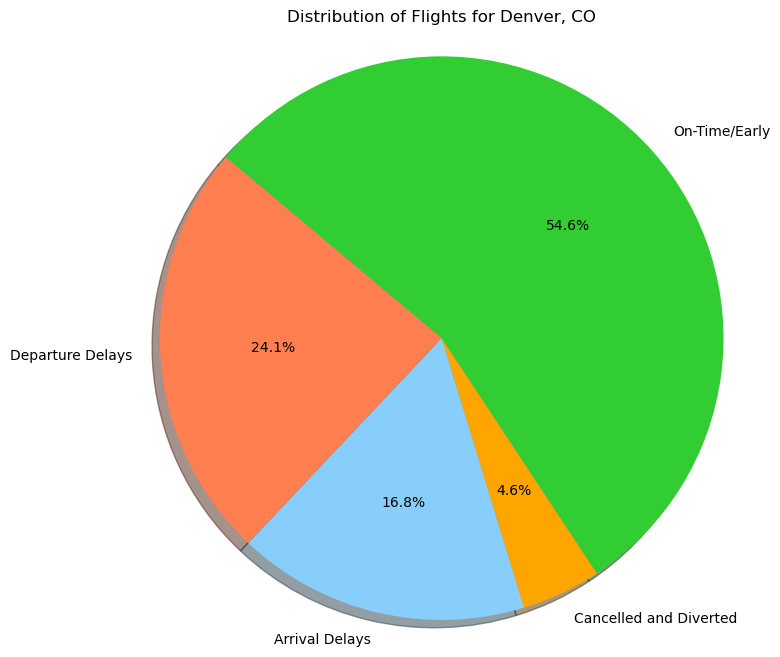

In [46]:
# Data for the pie chart
labels = ['Departure Delays', 'Arrival Delays', 'Cancelled and Diverted', 'On-Time/Early']
sizes = [num_dep_delay_atlanta, num_arr_delay_atlanta, num_cancelled + num_diverted, num_no_delays]
colors = ['coral', 'lightskyblue', 'orange', 'limegreen']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Flights for Denver, CO')
plt.show()